In [31]:
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
sym.init_printing()


In [32]:
x,h,t = sym.symbols('x,h,t')
v0 = sym.symbols('v_0') # initial velocity
vc = sym.symbols('v_c') # climb velocity
dv = sym.symbols('dv') # climb velocity adjustment
dx = sym.symbols('dx') # x distance to point
dh = sym.symbols('dh') # altitude difference
v1 = sym.symbols('v_1') # final velocity
x0 = sym.symbols('x_0') # Distance to transition from v0 to vc
x1 = sym.symbols('x_1') # Distance to transition from v0 to vc
x2 = sym.symbols('x_2') # Distance transitioned during climb accel
x3 = sym.symbols('x_3') # Distance transitioned during steady climb
x4 = sym.symbols('x_4') # Distance at end of climb
x5 = sym.symbols('x_5') # Distance to transition from vc to v1
h0 = sym.symbols('h_0') # Initial altitude
h1 = sym.symbols('h_1') # Altitude at x1
h2 = sym.symbols('h_2') # Altitude at x2
h3 = sym.symbols('h_3') # Altitude at x3
h4 = sym.symbols('h_4') # Altitude at x4
h5 = sym.symbols('h_5') # Altitude at x5
t0 = sym.symbols('t_0') # time at x0
t1 = sym.symbols('t_1') # time at x1
t2 = sym.symbols('t_2') # time at x2
t3 = sym.symbols('t_3') # time at x3
t4 = sym.symbols('t_4') # time at x4
t5 = sym.symbols('t_5') # time at x5
ax = sym.symbols('a_x') # horizontal acceleration
az = sym.symbols('a_z') # vertical acceleration
dax = sym.symbols('da_x') # horizontal acceleration
daz = sym.symbols('da_z') # vertical acceleration
hdot = sym.symbols('\dot{h}') # Vertical speed
hdot0 = sym.symbols('\dot{h}_0') # Initial Vertical speed

In [33]:
# Ground values for free variables
_v0 = 1
_vc = 0.8
_v1 = 1
_ax = 1.5
_az = 1
_hdot = 2.5
_hdot0 = 0
_h0  = 0
_x0 = 0
_t0 = 0
_dax = -1
_daz = -1
_dx = dx.subs(_x0+dx,8.6423)
_dh = dh.subs(_h0+dh,10)
sub = {v0:_v0,vc:_vc,ax:_ax,az:_az,hdot:_hdot,hdot0:_hdot0,h0:_h0,dx:_dx,dh:_dh,x0:_x0,t0:_t0,dax:_dax,daz:_daz,h4:_h0+_dh,h5:_h0+_dh,v1:_v1}

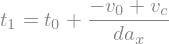

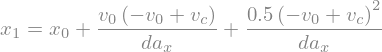

In [34]:
# Using this equation: v = u + a*t
# Time to reach x1 from x0 with acceleration ax: (ax is deceleration if vc < v0)
dt_01 = (vc-v0)/(dax) 

# Using equation: s = ut + 1/2*a*t^2
# Distance traveled from x0 to x1
dx_01 = v0*dt_01 + 1/2*(dax)*dt_01**2 

exp6 = sym.Eq(x1,x0 + dx_01)
exph01 = sym.Eq(h1,h0)
exp7 = sym.Eq(t1,t0 + dt_01)

display(exp7,exp6,exph01)

_t1 = exp7.args[1].subs(sub); sub[t1] = _t1
_x1 = exp6.args[1].subs(sub); sub[x1] = _x1
_h1 = exph01.args[1].subs(sub); sub[h1] = _h1
_t1,_x1,_h1


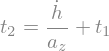

In [35]:
# Expression to compute h during initial vertical acceleration
# v = u + at
dt_12 = hdot/az
# For all t \in [t1,t2], the following is true for h and x
exp4 = sym.Eq(h,h0 + hdot0*(t-t1) + 0.5*az*(t-t1)**2)
exp5 = sym.Eq(x,x1 + vc*(t-t1))
expt12 = sym.Eq(t2,t1 + dt_12)
exph2 = sym.Eq(h2,exp4.args[1].subs({t:t2}))
expx2 = sym.Eq(x2,exp5.args[1].subs({t:t2}))
_t2 = expt12.args[1].subs(sub); sub[t2]=_t2
_h2 = exph2.args[1].subs(sub); sub[h2]=_h2
_x2 = expx2.args[1].subs(sub); sub[x2]=_x2
display(exp4,exp5,expt12,exph2,expx2)
_t2,_x2,_h2

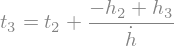

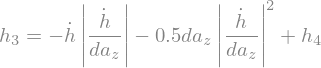

In [36]:
# expressions for x and h during steady climb
# For all t \in [t2,t3], the following is true for h and x
exp12 = sym.Eq(h,h2 + hdot*(t-t2))
exp13 = sym.Eq(x,x2 + vc*(t-t2))
dt_34 = abs(hdot/daz)
exp9 = sym.Eq(h3,h4 - (hdot*(dt_34) + 0.5*daz*(dt_34)**2))
exp11 = sym.Eq(t3,t2 + (h3-h2)/hdot)
exp8 = sym.Eq(x3,x2 + vc*(t3-t2))

display(exp12,exp13,exp11,exp9,exp8)
_h3 = exp9.args[1].subs(sub); sub[h3]=_h3
_t3 = exp11.args[1].subs(sub); sub[t3] = _t3
_x3 = exp8.args[1].subs(sub); sub[x3] = _x3
_t3,_x3,_h3

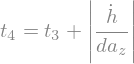

In [37]:

exp10 = sym.Eq(t4,t3 + dt_34) 
# For t \in [t3,t4]
exp14 = sym.Eq(h,(h3 + hdot*(t-t3) + 0.5*daz*(t-t3)**2))
exp15 = sym.Eq(x,(x3 + vc*(t-t3)))
exph4 = sym.Eq(h4,h5)
expx4 = sym.Eq(x4,exp15.args[1].subs({t:t4}))
display(exp10,exp14,exp15,exph4,expx4)
_t4 = exp10.args[1].subs(sub); sub[t4] = _t4
_x4 = expx4.args[1].subs(sub); sub[x4] = _x4
_h4 = exph4.args[1].subs(sub)
_t4,_x4,_h4

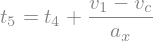

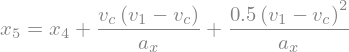

In [38]:
# Time to reach v1 from vc with accelration ax: (ax is deceleration if vc > v1)
dt_45 = (v1 - vc)/(ax)

# Distance traveled from x4 to x5
dx_45 = vc*dt_45 + 1/2*(ax)*dt_45**2

expt5 = sym.Eq(t5,t4+dt_45)
expx5 = sym.Eq(x5,x4 + dx_45)
exph5 = sym.Eq(h5,h0+dh)
display(expt5,expx5,exph5)
_t5 = expt5.args[1].subs(sub); sub[t5] = _t5
_x5 = expx5.args[1].subs(sub); sub[x5] = _x5
_h5 = exph5.args[1].subs(sub)
_t5,_x5,_h5

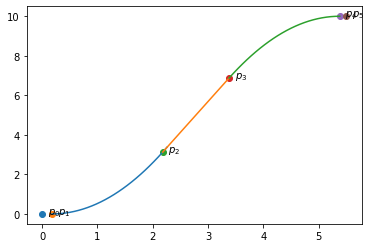

In [39]:
# Plot points and vertical profile

f1 = sym.lambdify(t,exp5.args[1].subs(sub))
f2 = sym.lambdify(t,exp4.args[1].subs(sub))
f3 = sym.lambdify(t,exp13.args[1].subs(sub))
f4 = sym.lambdify(t,exp12.args[1].subs(sub))
f5 = sym.lambdify(t,exp15.args[1].subs(sub))
f6 = sym.lambdify(t,exp14.args[1].subs(sub))
t0t1 = [i for i in np.arange(_t0,_t1+0.1,0.1)]
t1t2 = [i for i in np.arange(_t1,_t2+0.1,0.1)]
t2t3 = [i for i in np.arange(_t2,_t3+0.1,0.1)]
t3t4 = [i for i in np.arange(_t3,_t4+0.1,0.1)]
plt.scatter(0,0,marker='o')
plt.scatter(_x1,0,marker='o')
plt.scatter(_x2,_h2,marker='o')
plt.scatter(_x3,_h3,marker='o')
plt.scatter(_x4,_h4,marker='o')
plt.scatter(_x5,_h5,marker='o')
plt.annotate("$p_0$",(0+0.1,0))
plt.annotate("$p_1$",(_x1+0.1,_h1))
plt.annotate("$p_2$",(_x2+0.1,_h2))
plt.annotate("$p_3$",(_x3+0.1,_h3))
plt.annotate("$p_4$",(_x4+0.1,_h4))
plt.annotate("$p_5$",(_x5+0.1,_h5))
plt.plot([float(f1(i)) for i in t1t2],[float(f2(i)) for i in t1t2])
plt.plot([float(f3(i)) for i in t2t3],[float(f4(i)) for i in t2t3])
plt.plot([float(f5(i)) for i in t3t4],[float(f6(i)) for i in t3t4])
plt.show()

In [40]:
display("Success criteria:")
success = sym.LessThan(x5-x0,dx)
display(success)
lhs1 = sym.Eq(x5,expx5.args[1].subs(sub))
rhs = sym.Eq(dx,dx.subs(sub))
display(lhs1,rhs)

'Success criteria:'